<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/Times_Series_Forecasting_with_ARIMA_and_SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series forecasting

# Passenger Volume forecasting on singapore changi airport


Technical steps:

1. Standardize time series
    - handle missing values
    - handle noise/outliers
    - Normalize the time series
    
2. Time Series EDA
    - Decomposition of components
    - Analyze trend, seasionality visually
    - Perform Dicky fuller test to analyze if there is trend
    - perform autocorrelation and partial autocorrelation analysis
    - identify suitable values of p,d,q
    
3. Apply ARIMA
    - apply ARIMA
    - forecast 
    - evaluate forecast
    - tune and optimize

In [27]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# <b><font color=#ff3322> RESTART RUNTIME AFTER THIS </font></b>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1]:
!wget -q https://storage.data.gov.sg/civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly/civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly.zip
!unzip -q civil-aircraft-arrivals-departures-passengers-and-mail-changi-airport-monthly.zip

In [2]:
# load data
df = pd.read_csv(r"/content/civil-aircraft-arrivals-departures-and-passengers-changi-airport-monthly.csv")
df.shape

(974, 3)

In [3]:
df.head()

,month,level_1,value
0,1980-01,Total Aircraft Arrivals And Departures,6501
1,1980-01,Total Passengers,566879
2,1980-02,Total Aircraft Arrivals And Departures,6112
3,1980-02,Total Passengers,552263
4,1980-03,Total Aircraft Arrivals And Departures,6391


In [4]:
df = df[df['level_1']=='Total Passengers']
df.shape

(487, 3)

In [5]:
df.head()

,month,level_1,value
1,1980-01,Total Passengers,566879
3,1980-02,Total Passengers,552263
5,1980-03,Total Passengers,597644
7,1980-04,Total Passengers,561218
9,1980-05,Total Passengers,587003


In [6]:
df.month = pd.to_datetime(df['month'])
df = df[['month','value']]
df2 = df.copy()
df.head()

,month,value
1,1980-01-01,566879
3,1980-02-01,552263
5,1980-03-01,597644
7,1980-04-01,561218
9,1980-05-01,587003


In [7]:
df.index = df.month
df = df[['value']]
df.head()

,value
month,
1980-01-01,566879
1980-02-01,552263
1980-03-01,597644
1980-04-01,561218
1980-05-01,587003


In [8]:
# taking data from 2004 to 2018
df3 = df['2004-01-01':'2018-12-01']
df3.shape

(180, 1)

In [9]:
df3.head()

,value
month,
2004-01-01,2516148
2004-02-01,2173157
2004-03-01,2365455
2004-04-01,2370567
2004-05-01,2375387


In [10]:
sns.set_theme()

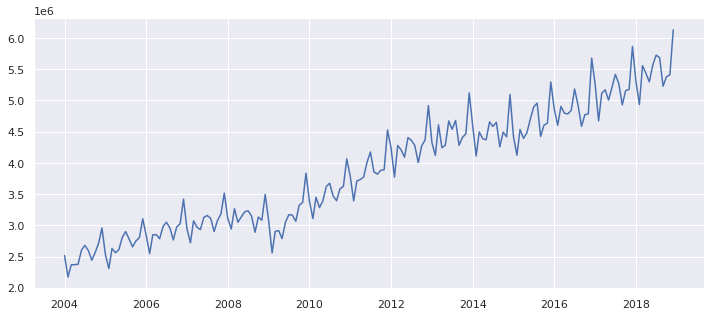

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df3)
plt.show()

### Dicky Fuller test to check for stationarity

- Null Hypothesis: Data is not stationary, it has trend

CI = 95%, alpha = 1 - CI = 1 - 0.95 = 0.05

    - if pvalue>alpha = null hypothesis is accepted
    - if pvalue< alpha = null hypothesis is rejected

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(df3['value'])

(0.00486864803486511,
 0.9589328726157863,
 14,
 165,
 {'1%': -3.470616369591229,
  '10%': -2.57619681359045,
  '5%': -2.8792214018977655},
 4326.773223249827)

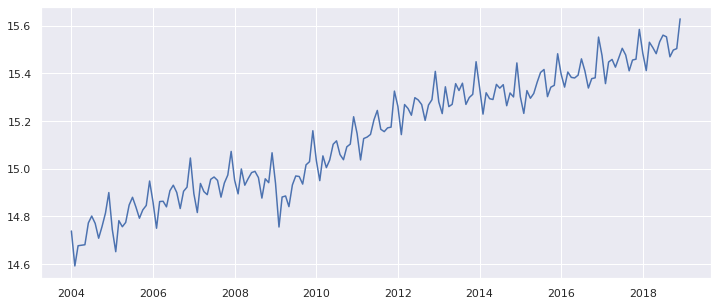

In [14]:
df3log = np.log(df3)
plt.figure(figsize=(12,5))
plt.plot(df3log)
plt.show()

In [15]:
df3logdiff = df3log - df3log.shift(1)
df3logdiff.head()

,value
month,
2004-01-01,NaN
2004-02-01,-0.146548
2004-03-01,0.084789
2004-04-01,0.002159
2004-05-01,0.002031


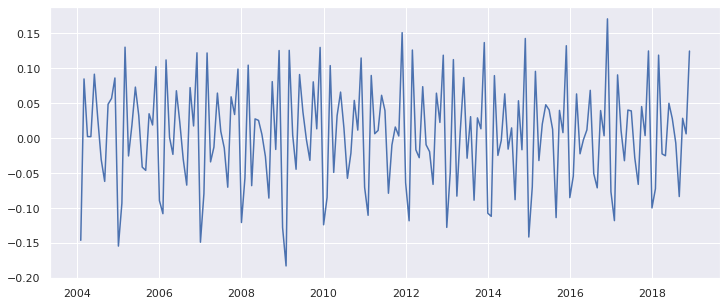

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df3logdiff)
plt.show()

In [17]:
adfuller(df3logdiff['value'].dropna())

(-3.153331479193538,
 0.022850007889816646,
 14,
 164,
 {'1%': -3.47086589632514, '10%': -2.57625492712671, '5%': -2.879330279087651},
 -677.5760431186804)

### Decoposing time series data

<Figure size 864x576 with 0 Axes>

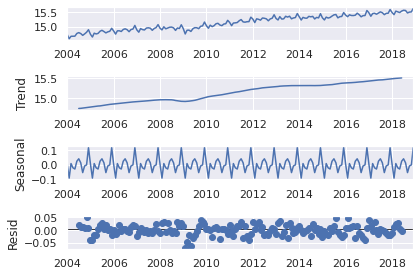

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df3log,model='additive',period=12)
plt.figure(figsize=(12,8))
result.plot()
plt.show()

## implementing forecasting model using ARIMA

In [20]:
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima(df3log,suppress_warnings=True,seasonal=False,trace=True,
                  start_p=1,start_q=1,d=1,max_p=3,max_q=3)
model.fit(df3log)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-485.213, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-417.068, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-428.011, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-483.558, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-418.275, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-498.949, Time=0.76 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-464.045, Time=0.39 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-497.320, Time=1.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-496.375, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-496.085, Time=0.56 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-472.341, Time=0.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-497.143, Time=1.20 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-482.497, Time=0.32 sec

Best model:  ARIMA(2,1,1)(0,0,0)[0] intercept
Total fit time: 7.029 seconds


ARIMA(order=(2, 1, 1), scoring_args={}, suppress_warnings=True)

In [ ]:
test = df['2019-01-01':'2019-12-01']
test.shape

(12, 1)

In [ ]:
forecast = model.predict(n_periods=12)
forecast = pd.DataFrame(np.exp(forecast,),index=test.index)
forecast

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(test,c='g')
plt.plot(forecast,c='r')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(test,forecast)

0.04076955790854319

# Seasonal ARIMA

In [ ]:
model = auto_arima(df3log,suppress_warnings=True,seasonal=True,
                   start_P=0,start_Q=0,max_P=3,max_Q=3,trace=True,m=12,
                  start_p=1,start_q=1,d=1,max_p=3,max_q=3)
model.fit(df3log)

In [ ]:
test = df['2019-01-01':'2019-12-01']
test.shape

(12, 1)

In [ ]:
forecast = model.predict(n_periods=12)
forecast = pd.DataFrame(np.exp(forecast,),index=test.index)
forecast

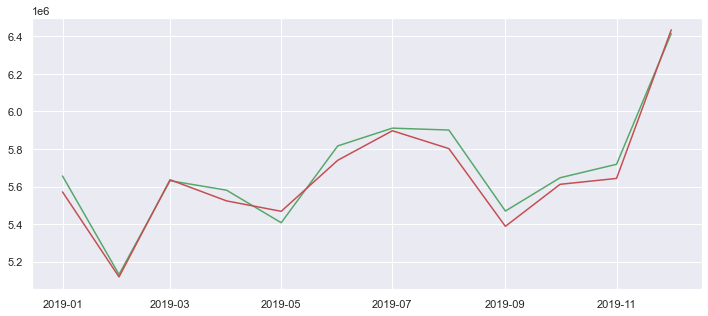

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(test,c='g')
plt.plot(forecast,c='r')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
mean_absolute_percentage_error(test,forecast)

0.009119066986778357

In [ ]:
import pmdarima
pmdarima.__version__

'1.8.4'

In [ ]:
import statsmodels
statsmodels.__version__

'0.12.2'